In [134]:
import pandas as pd
import numpy as np
import csv
import os
import cv2
import matplotlib.pyplot as plt
import random
import gc

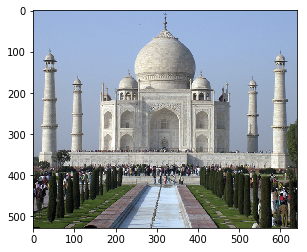

In [165]:
train_dir = 'train_images'
train_imgs = ['train_images/{}'.format(i) for i in os.listdir(train_dir)]
del train_imgs[0]
#print(train_imgs)

for ima in train_imgs:
    img1 = cv2.imread(ima)
    cv_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    #plt.show()


In [166]:
nrows = 150
ncolumns = 150
channels = 1

def read_and_process_image(list_of_images):
    x = []
    y = []
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC))
        if 'tm' in image:
            y.append(0)
        elif 'gw' in image:
            y.append(1)
        
    return y, x

y, x = read_and_process_image(train_imgs)
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


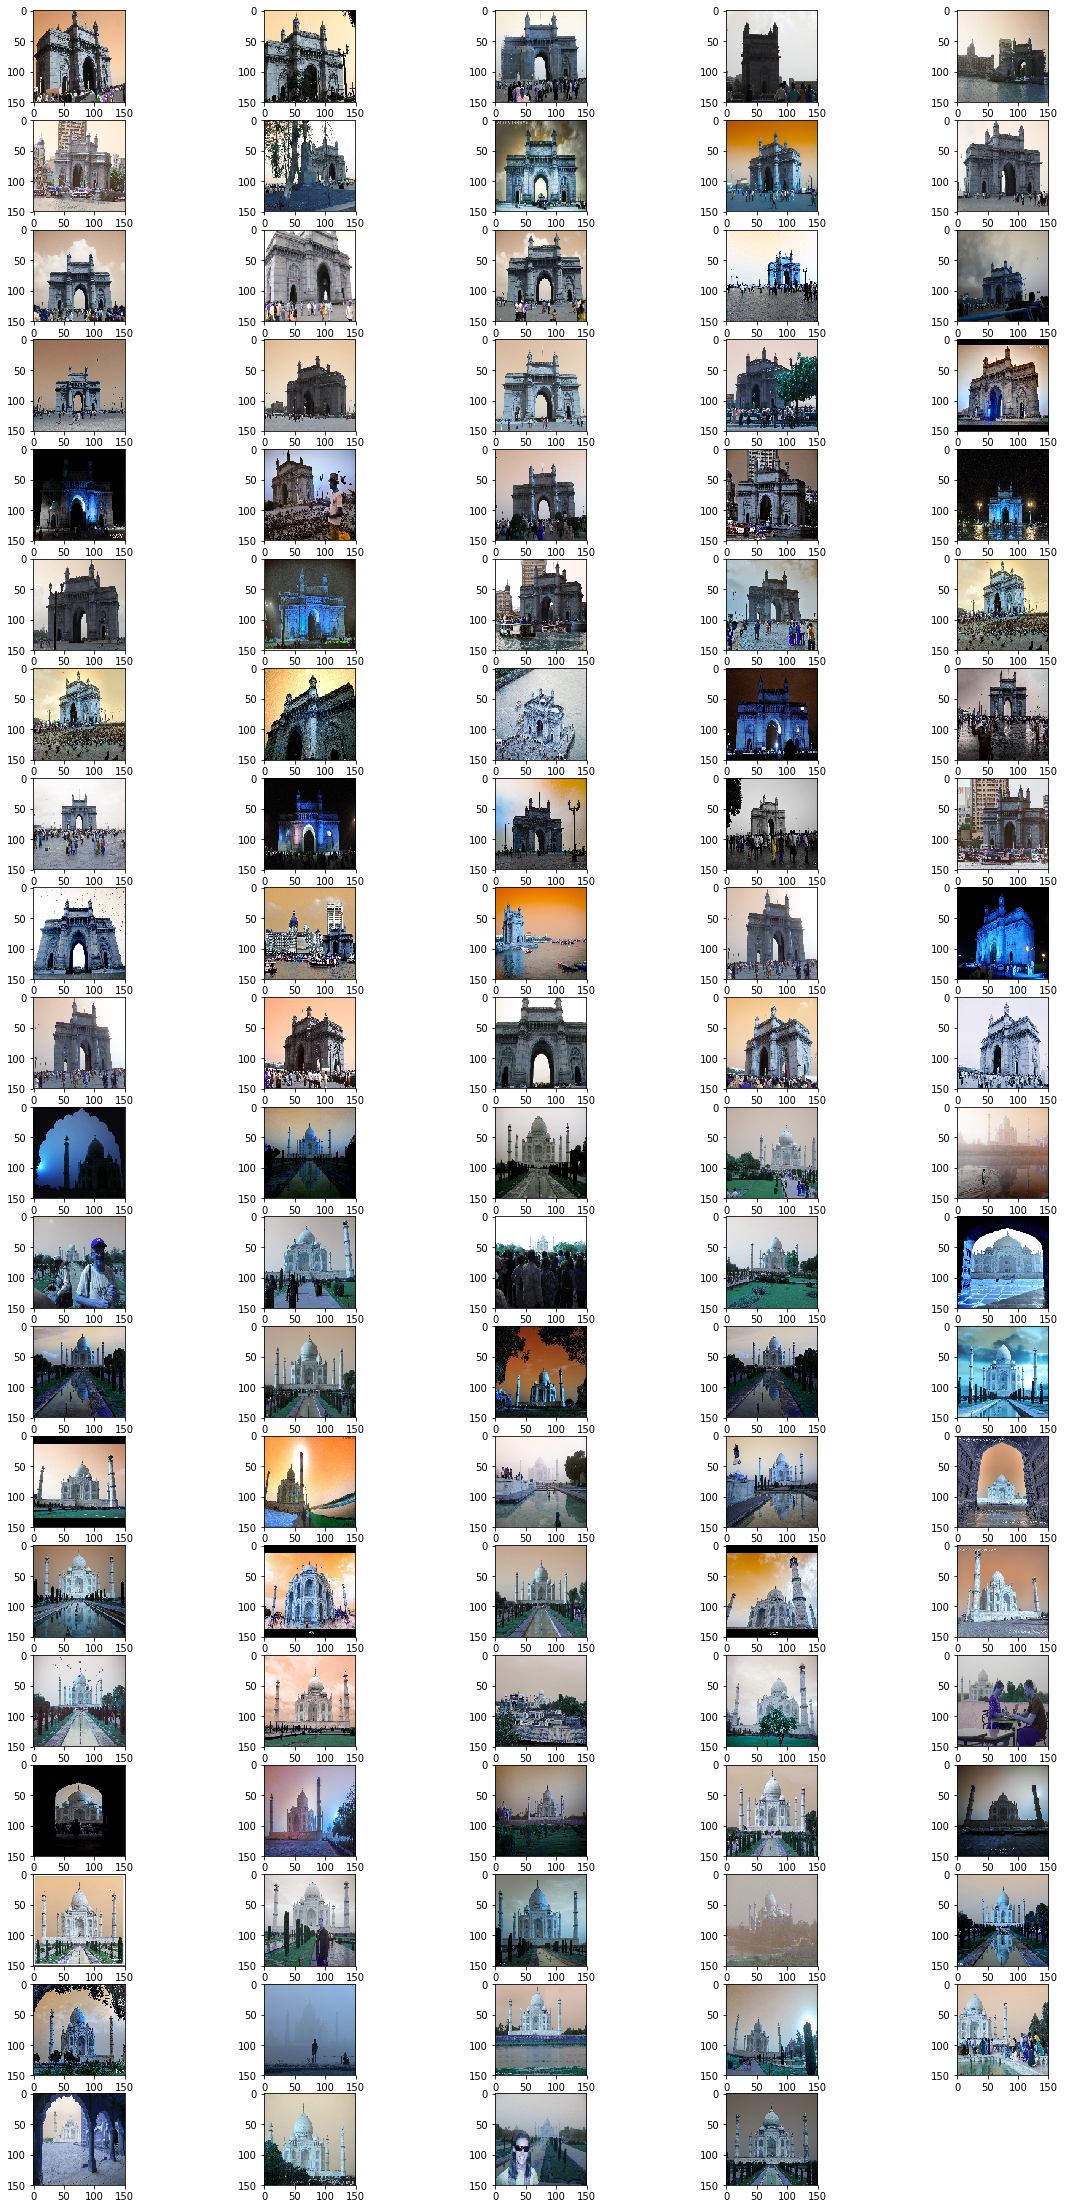

In [137]:
plt.figure(figsize = (20, 40))
columns = len(train_imgs) - 1
for i in range(columns):
    plt.subplot((columns / 5) + 1, 5, i + 1)
    plt.imshow(x[i])

Text(0.5, 1.0, 'Labels for tajmahal and gateway')

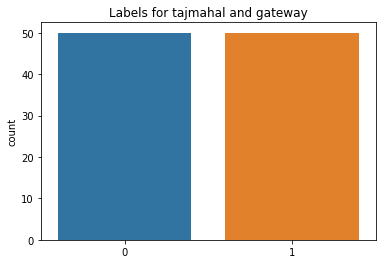

In [139]:
import seaborn as sns
x = np.array(x)
y = np.array(y)
sns.countplot(y)
plt.title('Labels for tajmahal and gateway')

In [140]:
print("Shape of train image is: ", x.shape)
print("Shape of labels is:", y.shape)

Shape of train image is:  (100, 150, 150, 3)
Shape of labels is: (100,)


In [141]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 2)

print("Shape of train image is: ", x_train.shape)
print("Shape of val images is: ", x_val.shape)
print("Shape of labels is: ", y_train.shape)
print("Shape of labels is: ", y_val.shape)

Shape of train image is:  (80, 150, 150, 3)
Shape of val images is:  (20, 150, 150, 3)
Shape of labels is:  (80,)
Shape of labels is:  (20,)


In [142]:
ntrain = len(x_train)
print(ntrain)
nval = len(x_val)
print(nval)
batch_size = 20

80
20


In [143]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

In [144]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [145]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

In [146]:
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255) 

In [147]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(x_val, y_val, batch_size=batch_size)

In [148]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // 5,
                              epochs=10,
                              validation_data=val_generator,
                              validation_steps=nval // 5)

Epoch 1/10
16/16 [==============================] - 8s 496ms/step - loss: 0.6800 - acc: 0.5625 - val_loss: 0.5980 - val_acc: 0.7500
Epoch 2/10
16/16 [==============================] - 7s 455ms/step - loss: 0.6340 - acc: 0.7219 - val_loss: 0.4731 - val_acc: 0.8500
Epoch 3/10
16/16 [==============================] - 7s 452ms/step - loss: 0.5549 - acc: 0.7625 - val_loss: 0.3763 - val_acc: 0.9000
Epoch 4/10
16/16 [==============================] - 8s 496ms/step - loss: 0.4804 - acc: 0.7750 - val_loss: 0.3109 - val_acc: 0.9000
Epoch 5/10
16/16 [==============================] - 8s 492ms/step - loss: 0.4300 - acc: 0.8156 - val_loss: 0.2723 - val_acc: 0.9000
Epoch 6/10
16/16 [==============================] - 8s 506ms/step - loss: 0.4179 - acc: 0.8188 - val_loss: 0.4252 - val_acc: 0.7000
Epoch 7/10
16/16 [==============================] - 8s 486ms/step - loss: 0.4102 - acc: 0.8250 - val_loss: 0.2763 - val_acc: 0.9500
Epoch 8/10
16/16 [==============================] - 8s 501ms/step - loss: 0.

In [149]:
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

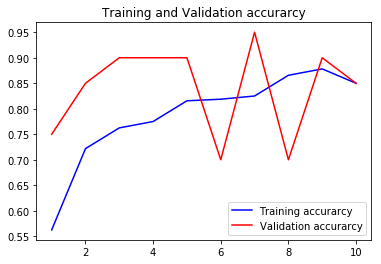

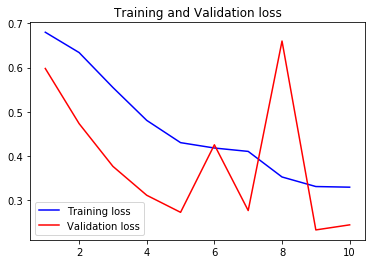

In [151]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [159]:
test_dir = 'test_images'
test_imgs = ['test_images/{}'.format(i) for i in os.listdir(test_dir)]
del test_imgs[0]
print(test_imgs)

['test_images/tes1.jpg', 'test_images/tes2.JPG', 'test_images/tes3.jpg', 'test_images/tes4.jpg', 'test_images/tes5.jpeg', 'test_images/test1.jpg']


In [160]:
y_test, x_test = read_and_process_image(test_imgs) #Y_test in this case will be empty.
p = np.array(x_test)
print("x-Test is:")
print(x_test)
print("y-test is: ")
print(y_test)
print("p is: ")
print(p)
print("The end")
test_datagen = ImageDataGenerator(rescale=1./255)

x-Test is:
[array([[[207, 161, 130],
        [207, 161, 130],
        [207, 161, 130],
        ...,
        [208, 165, 138],
        [208, 165, 138],
        [208, 165, 138]],

       [[207, 161, 130],
        [207, 161, 130],
        [207, 161, 130],
        ...,
        [208, 165, 138],
        [208, 165, 138],
        [208, 165, 138]],

       [[209, 163, 132],
        [209, 163, 132],
        [206, 160, 129],
        ...,
        [210, 167, 140],
        [210, 167, 140],
        [210, 167, 140]],

       ...,

       [[118, 130, 132],
        [113, 128, 130],
        [131, 151, 152],
        ...,
        [ 97, 116, 121],
        [106, 125, 130],
        [109, 128, 133]],

       [[116, 129, 131],
        [115, 131, 132],
        [118, 139, 140],
        ...,
        [107, 124, 131],
        [106, 126, 131],
        [104, 124, 129]],

       [[127, 128, 129],
        [131, 136, 136],
        [122, 133, 132],
        ...,
        [116, 131, 131],
        [123, 135, 138],
        [119

[[0.98788583]]
[[0.8377253]]
[[0.0738757]]
[[0.00981565]]
[[0.93381953]]
[[0.02097032]]


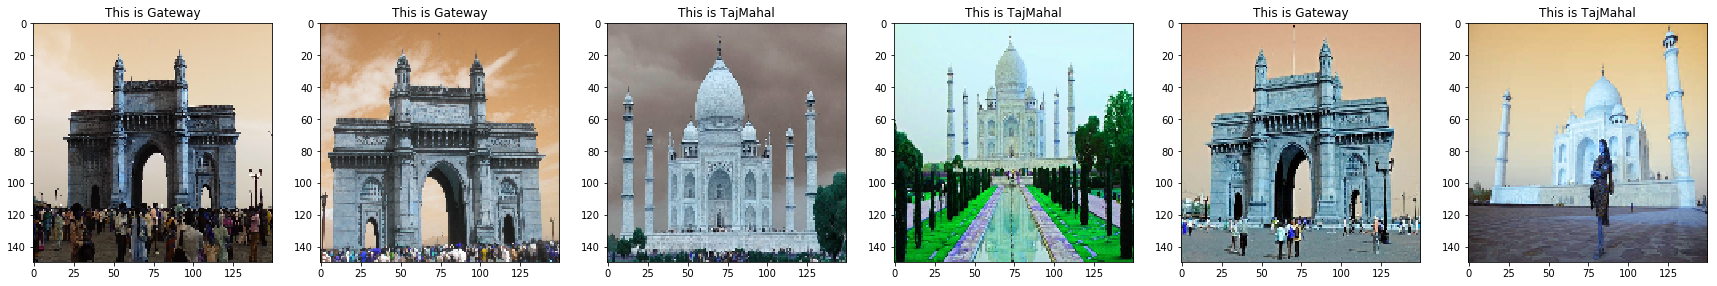

In [161]:
i = 0
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(p, batch_size=1):
    
    pred = model.predict(batch)
    print(pred)
    if pred > 0.5:
        text_labels.append('Gateway')
    else:
        text_labels.append('TajMahal')
    plt.subplot(2/ len(test_imgs) + 1, len(test_imgs), i + 1)
    plt.title('This is ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 6 == 0:
        break
plt.show()